In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Exploratory data analysis
***

## 1. Data understaning
- shape
- head
- tail
- info
- describe
- dtypes

## 2. Data preparation
- dropping irrelevant columns and rows
- identifying duplicate rows and rows
- renaming columns
- feature creation

## 3. Feature understanding (univariate analysis)
- histogram distributions
- density distributions
- boxplots

## 4. Feature relationships
- scatterplot
- heatmap correlation
- pairplot

***

# 1. Data understanding
- shape
- head
- tail
- info
- describe
- dtypes

In [2]:
data_path = "/ml/House_Rent_Dataset.csv"
df = pd.read_csv(data_path)

In [3]:
df.shape

(4746, 12)

In [4]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [5]:
df.tail()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent
4745,2022-05-04,2,15000,1000,4 out of 5,Carpet Area,Suchitra Circle,Hyderabad,Unfurnished,Bachelors,2,Contact Owner


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BHK,4746.0,2.083860,0.832256,1.0,2.0,2.0,3.0,6.0
Rent,4746.0,34993.451327,78106.412937,1200.0,10000.0,16000.0,33000.0,3500000.0
Size,4746.0,967.490729,634.202328,10.0,550.0,850.0,1200.0,8000.0
Bathroom,4746.0,1.965866,0.884532,1.0,1.0,2.0,2.0,10.0


In [8]:
df.dtypes

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

# 2. Data preparation
- dropping irrelevant columns and rows
- identifying duplicate columns and rows
- renaming columns
- feature creation

In [9]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [10]:
# Let's assume Point of Contact, Area Locality and Posted On are irrelevant columns
df = df.drop(['Point of Contact', 'Area Locality', 'Posted On'], axis=1)
df.head()

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,Ground out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,2
1,2,20000,800,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,1 out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,1
4,2,7500,850,1 out of 2,Carpet Area,Kolkata,Unfurnished,Bachelors,1


In [11]:
df.duplicated().sum()

41

In [12]:
# Remove duplicates by indexing non-duplicates
df = df[~df.duplicated()].copy()
df.reset_index(drop=True, inplace=True)
df.duplicated().sum()

0

In [13]:
df.isna().sum()

BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
dtype: int64

In [14]:
df.isnull().sum()

BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
dtype: int64

In [15]:
df['Floor'].unique()

array(['Ground out of 2', '1 out of 3', '1 out of 2', 'Ground out of 1',
       'Ground out of 4', '1 out of 4', '1 out of 1', 'Ground out of 3',
       '2 out of 3', '4 out of 5', '2 out of 2', '2 out of 5',
       '4 out of 14', '3 out of 3', '5 out of 5', '4 out of 4',
       '7 out of 8', '2 out of 4', '3 out of 4', '1 out of 5',
       '8 out of 5', 'Ground out of 6', '2 out of 1',
       'Upper Basement out of 4', 'Ground out of 5', '3 out of 5',
       '11 out of 19', '5 out of 10', '11 out of 14',
       'Lower Basement out of 2', '2 out of 7', '4 out of 10',
       '7 out of 10', '2 out of 13', '6 out of 7', '4 out of 7',
       '14 out of 14', '43 out of 78', '2 out of 8', '13 out of 18',
       '5 out of 12', '18 out of 24', '3 out of 7', '17 out of 31',
       '11 out of 21', '7 out of 19', '14 out of 23', '9 out of 20',
       'Upper Basement out of 9', '19 out of 24', '3 out of 21',
       '1 out of 22', '8 out of 8', '6 out of 12', '4 out of 58',
       'Upper Basement o

In [16]:
unique_non_numeric_floors = set()

for i in df['Floor'].unique():
    sentence_split = i.split()
    if not sentence_split[0].isnumeric():
        unique_non_numeric_floors.add(sentence_split[0])

print(unique_non_numeric_floors)

{'Upper', 'Lower', 'Ground'}


In [17]:
def convert_floor(floor):
    first_token = floor.split()[0]
    # If floor is ground, return 0
    if first_token == 'Ground':
        return 0
    # If floor is upper or lower basement, return -1
    elif first_token == 'Lower' or first_token == 'Upper':
        return -1
    else:
        return int(first_token)
    
df['Floor'] = df['Floor'].apply(convert_floor)
df.head()

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,0,Super Area,Kolkata,Unfurnished,Bachelors/Family,2
1,2,20000,800,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,1,Super Area,Kolkata,Unfurnished,Bachelors/Family,1
4,2,7500,850,1,Carpet Area,Kolkata,Unfurnished,Bachelors,1


In [18]:
df['Floor'].unique()

array([ 0,  1,  2,  4,  3,  5,  7,  8, -1, 11,  6, 14, 43, 13, 18, 17,  9,
       19, 60, 34, 12, 26, 25, 53, 16, 10, 39, 32, 47, 28, 20, 15, 65, 40,
       37, 22, 21, 30, 35, 33, 44, 41, 46, 27, 45, 48, 50, 24, 23, 29, 49,
       36, 76])

# 3. Feature understanding (univariate analysis)
- histogram distributions
- density distributions
- boxplots

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4705 entries, 0 to 4704
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4705 non-null   int64 
 1   Rent               4705 non-null   int64 
 2   Size               4705 non-null   int64 
 3   Floor              4705 non-null   int64 
 4   Area Type          4705 non-null   object
 5   City               4705 non-null   object
 6   Furnishing Status  4705 non-null   object
 7   Tenant Preferred   4705 non-null   object
 8   Bathroom           4705 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 330.9+ KB


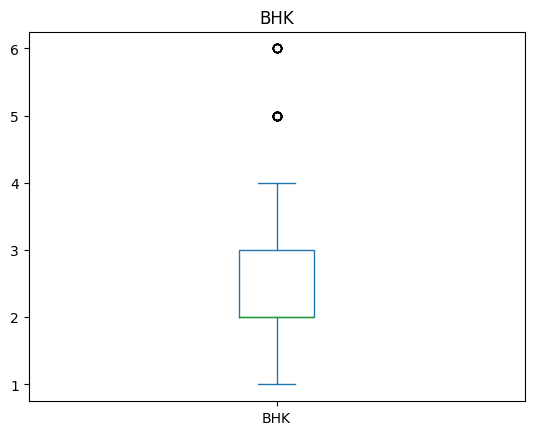

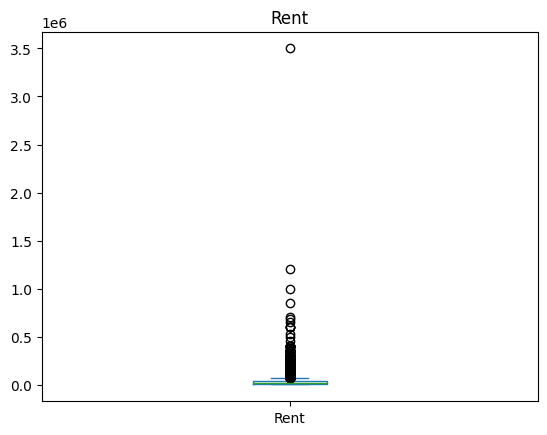

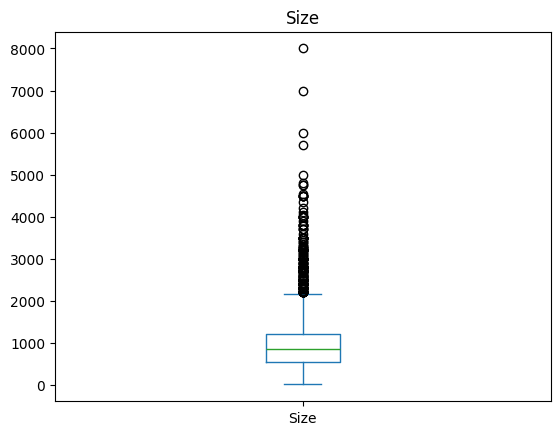

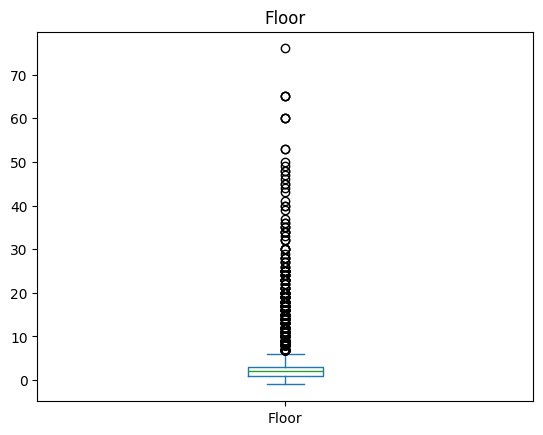

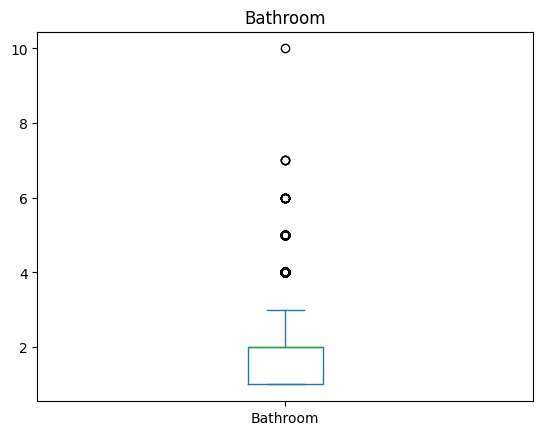

In [20]:
numeric_columns = ['BHK', 'Rent', 'Size', 'Floor', 'Bathroom']

for c in numeric_columns:

    df[c].plot(kind='box', title=c)
    plt.show()

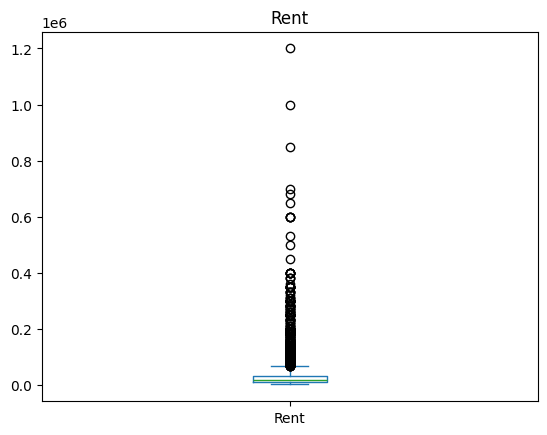

In [21]:
# Rent has an extreme outlier, so we will remove it

rent_outlier = df['Rent'].max()
idx = df[df['Rent'] == rent_outlier].index
df = df.drop(index=idx)

df['Rent'].plot(kind='box', title='Rent')
plt.show()

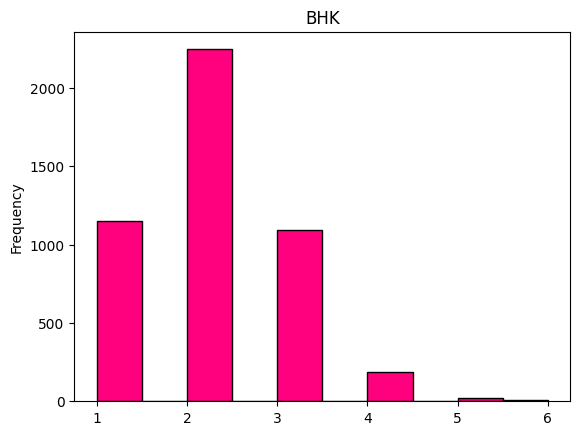

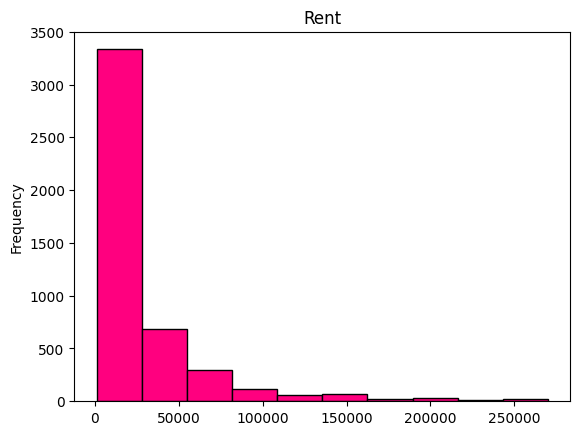

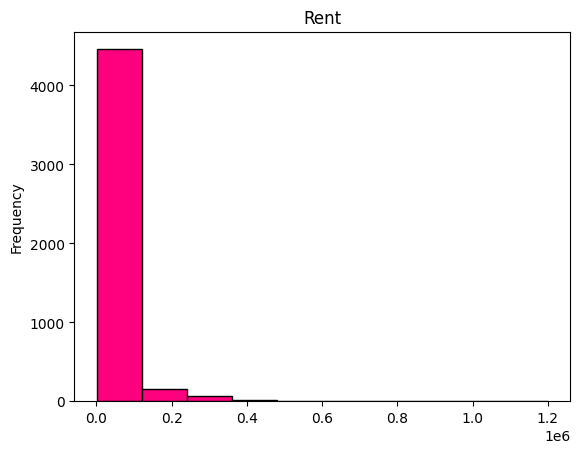

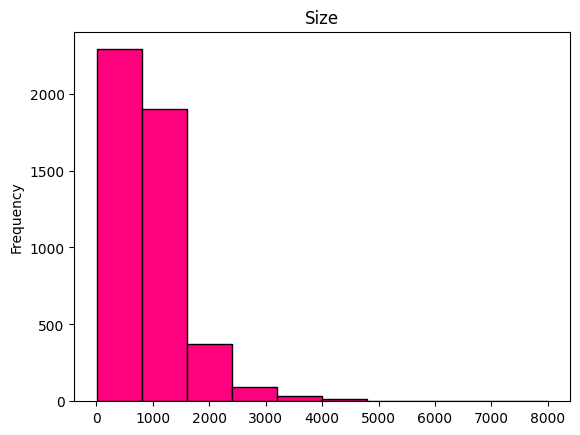

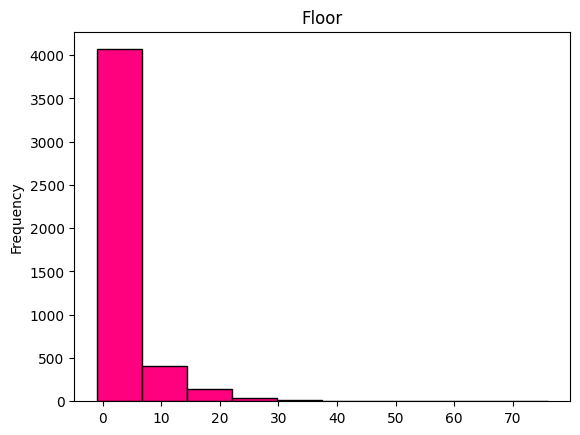

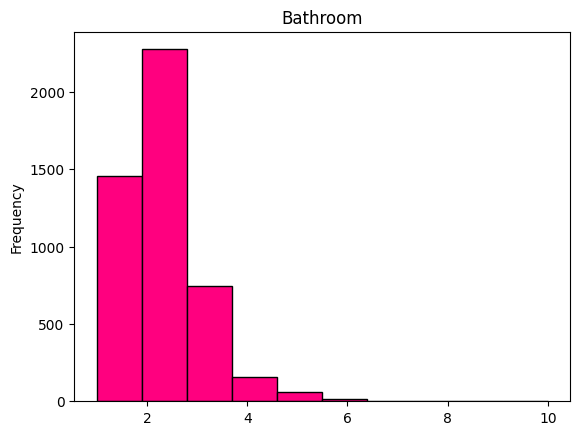

In [22]:
from scipy.stats import zscore

for c in numeric_columns:

    if c == 'Rent':
        rent_column = df[c].copy()
        # Removing outliers for better plotting
        rent_column = rent_column[(np.abs(zscore(rent_column)) < 4)] 
        rent_column.plot(kind='hist', title=c, edgecolor="black", color='#ff007f')
        plt.show()

    df[c].plot(kind='hist', edgecolor="black", title=c, color='#ff007f')
    plt.show()

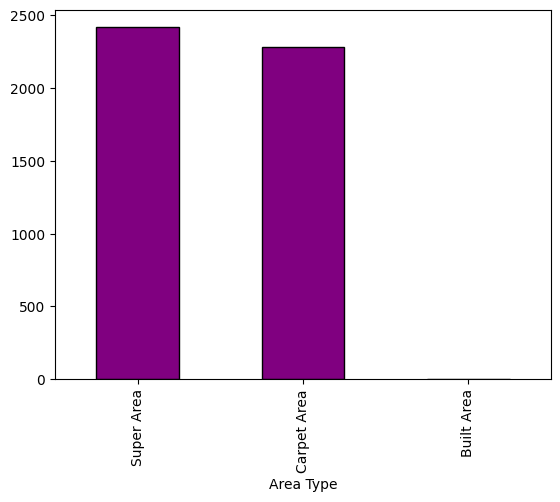

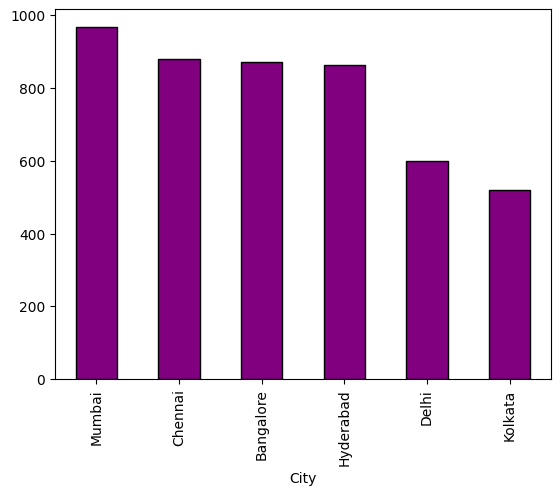

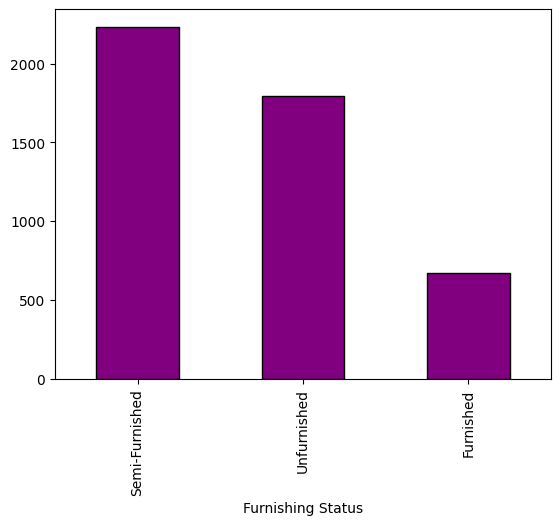

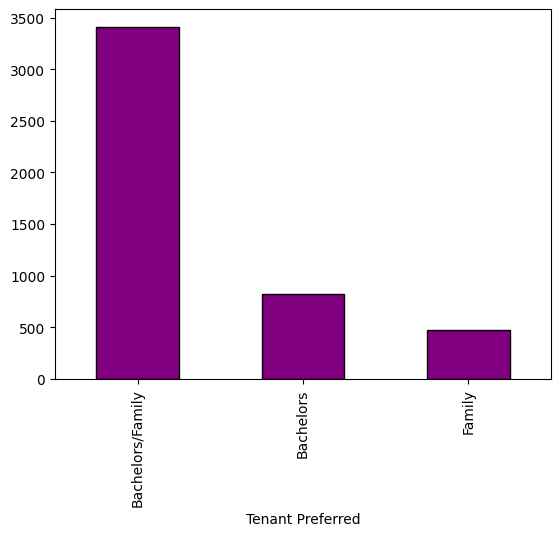

In [23]:
non_numeric_columns = ['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred']

for c in non_numeric_columns:

    df[c].value_counts().plot(kind='bar', edgecolor="black", color='purple')
    plt.show()

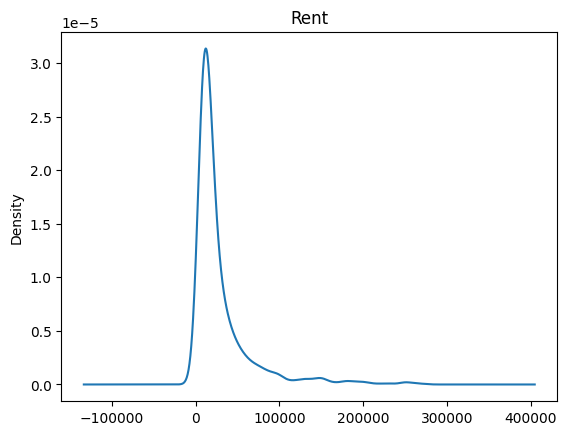

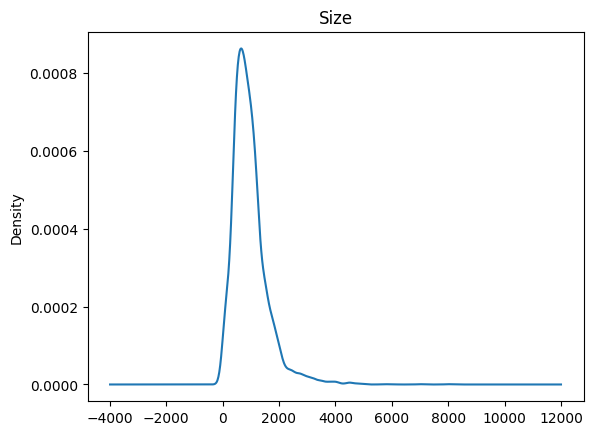

In [24]:
for c in ['Rent', 'Size']:

    if c == 'Rent':
        rent_column = df[c].copy()
        # Removing outliers for better plotting
        rent_column = rent_column[(np.abs(zscore(rent_column)) < 4)] 
        rent_column.plot(kind='density', title=c)
        plt.show()
    else:
        df[c].plot(kind='density', title=c)
        plt.show()

# 4. Feature relationships
- scatterplot
- heatmap correlation
- pairplot

In [25]:
df.head()

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,0,Super Area,Kolkata,Unfurnished,Bachelors/Family,2
1,2,20000,800,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,1,Super Area,Kolkata,Unfurnished,Bachelors/Family,1
4,2,7500,850,1,Carpet Area,Kolkata,Unfurnished,Bachelors,1


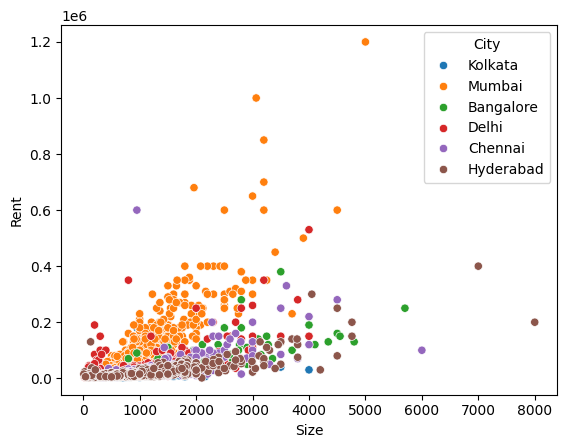

In [26]:
sns.scatterplot(data=df, x='Size', y='Rent', hue='City')
plt.show()

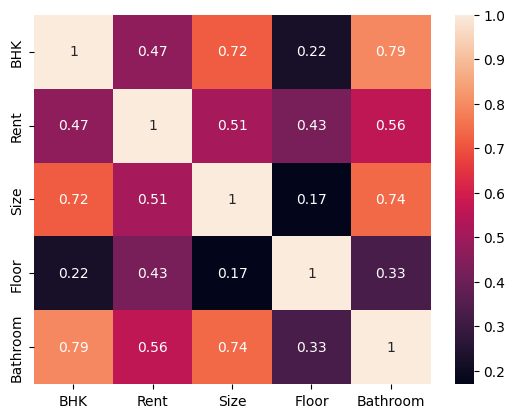

In [27]:
corr = df[['BHK', 'Rent', 'Size', 'Floor', 'Bathroom']].corr()
sns.heatmap(corr, annot=True)
plt.show()

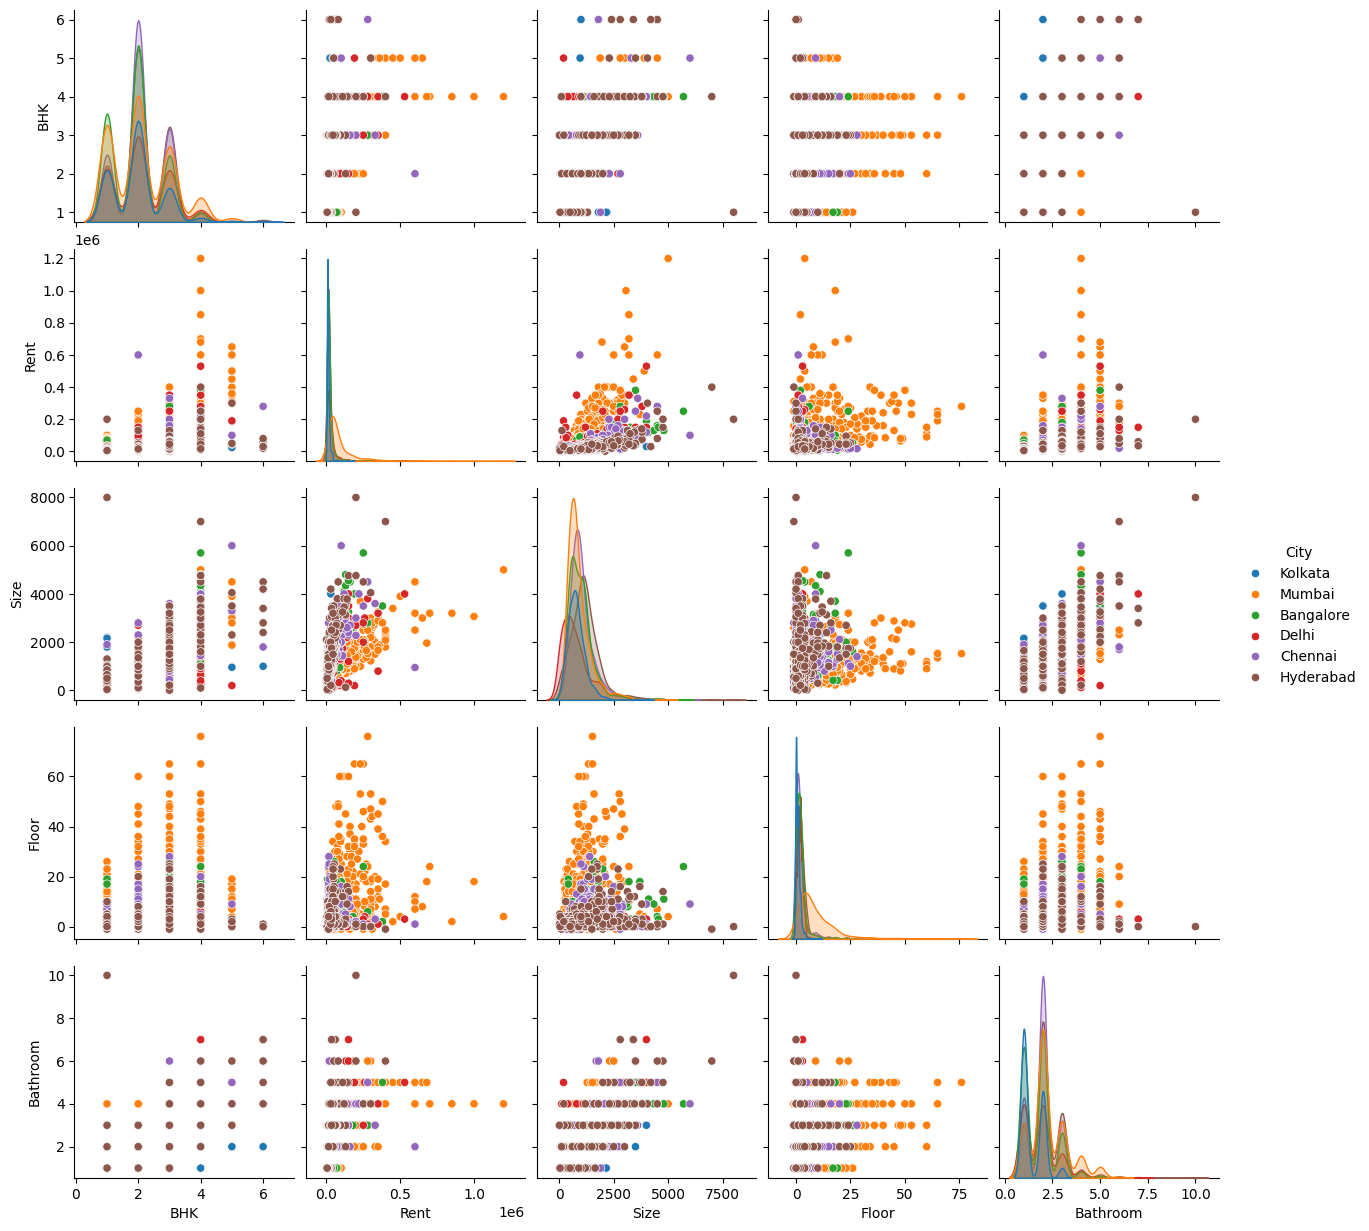

In [28]:
sns.pairplot(data=df, hue='City')
plt.show()

# Data preprocessing

In [29]:
df.head()

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,0,Super Area,Kolkata,Unfurnished,Bachelors/Family,2
1,2,20000,800,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,1,Super Area,Kolkata,Unfurnished,Bachelors/Family,1
4,2,7500,850,1,Carpet Area,Kolkata,Unfurnished,Bachelors,1


In [30]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Encode all non-numeric columns
df['Area Type'] = encoder.fit_transform(df['Area Type'])
df['City'] = encoder.fit_transform(df['City'])
df['Furnishing Status'] = encoder.fit_transform(df['Furnishing Status'])
df['Tenant Preferred'] = encoder.fit_transform(df['Tenant Preferred'])

df.head()

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,0,2,4,2,1,2
1,2,20000,800,1,2,4,1,1,1
2,2,17000,1000,1,2,4,1,1,1
3,2,10000,800,1,2,4,2,1,1
4,2,7500,850,1,1,4,2,0,1


In [31]:
X = df.drop('Rent', axis=1).to_numpy(dtype=np.float64)
y = df['Rent'].to_numpy(dtype=np.float64)

In [32]:
from scipy.stats import boxcox

# Perform boxcox transfrom on target variable
y_box, _lambda = boxcox(y)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_box, test_size=0.33, random_state=50)

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Normalize by scaling to mean 0 and variance 1
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# Model selection and training

In [35]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, AdaBoostRegressor

models = {'LinReg': LinearRegression(),
          'Ridge': Ridge(),
          'Lasso': Lasso(),
          'ElasticNet': ElasticNet(),
          'SVR': SVR(),
          'KNR': KNeighborsRegressor(),
          'RandomForest': RandomForestRegressor(),
          'GradBoost': GradientBoostingRegressor(),
          'HistGradBoost': HistGradientBoostingRegressor(),
          'AdaBoost': AdaBoostRegressor()}

In [36]:
from sklearn.metrics import r2_score, root_mean_squared_error

train_results = []

for m in models:
    models[m].fit(X_train, y_train)
    y_pred = models[m].predict(X_test)
    # Store model name , model error and r2 score
    train_results.append((m, root_mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)))

# Sort the training results by lowest error
train_results.sort(key=lambda x: x[1])

for model_name, model_accuracy, r2 in train_results:
    print(f'{model_name} error: {model_accuracy}, r2: {r2}')

HistGradBoost error: 0.014677052009912579, r2: 0.7715207352592293
GradBoost error: 0.01475925777357072, r2: 0.7689541555356703
RandomForest error: 0.01562628769369733, r2: 0.7410113345933094
KNR error: 0.016590803480116562, r2: 0.7080530353589195
AdaBoost error: 0.017819255785837228, r2: 0.663218482120405
Ridge error: 0.01941921738842946, r2: 0.6000252523760761
LinReg error: 0.019419386504315617, r2: 0.600018285835966
Lasso error: 0.030711256882851798, r2: -0.00037840336759265014
ElasticNet error: 0.030711256882851798, r2: -0.00037840336759265014
SVR error: 0.037150635132295884, r2: -0.4638669708364922


In [37]:
best_models = {}

for model_name, model_error, model_r2 in train_results[:2]:
    best_models[model_name] = models[model_name]

# Grid search - hyperparameter tuning

In [38]:
max_iter = [100, 200, 300]
learning_rate = [0.01, 0.1, 0.5]
max_bins = [100, 200, 255]

best_err = np.inf

for m in max_iter:
    for lr in learning_rate:
        for b in max_bins:
            model = HistGradientBoostingRegressor(max_iter=m, learning_rate=lr, max_bins=b)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            err = root_mean_squared_error(y_test, y_pred)
            if err < best_err:
                best_err = err
                best_models['HistGradBoost'] = model

In [39]:
n_estimators = [50, 100, 200]
learning_rate = [0.01, 0.1, 0.5]

best_err = np.inf

for n in n_estimators:
    for lr in learning_rate:
        model = GradientBoostingRegressor(n_estimators=n, learning_rate=lr)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        err = root_mean_squared_error(y_test, y_pred)
        if err < best_err:
            best_err = err
            best_models['GradBoost'] = model

# Before hyperparameter tuning

In [40]:
for model_name, model_error, model_r2 in train_results[:2]:
    print(f'Error for {model_name}: {model_error}')

Error for HistGradBoost: 0.014677052009912579
Error for GradBoost: 0.01475925777357072


# After hyperparameter tuning

In [41]:
for m in best_models:
    y_pred = best_models[m].predict(X_test)
    err = root_mean_squared_error(y_test, y_pred)
    print(f'Error for {m}: {err}')

Error for HistGradBoost: 0.014677052009912579
Error for GradBoost: 0.014686452717994755


# Prediction comparison

GradBoost error: 34812.69593457315


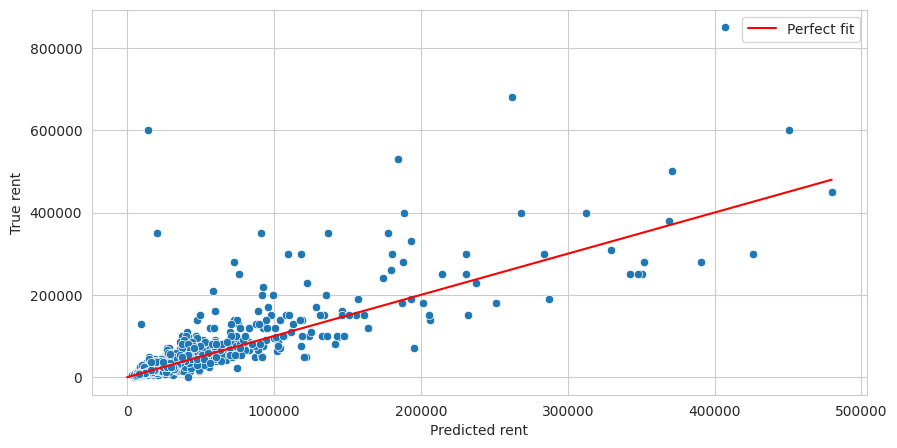

In [42]:
from scipy.special import inv_boxcox

y_true = inv_boxcox(y_test, _lambda)

y_pred_box = best_models['GradBoost'].predict(X_test)
y_pred = inv_boxcox(y_pred_box, _lambda)

print(f'GradBoost error: {root_mean_squared_error(y_true, y_pred)}')

plt.figure(figsize=(10, 5))

sns.set_style('whitegrid')
sns.scatterplot(x=y_pred, y=y_true)

line = np.linspace(0, np.max(y_pred))
plt.plot(line, line, color='red', label="Perfect fit")

plt.xlabel('Predicted rent')
plt.ylabel('True rent')

plt.legend()
plt.show()

HistGradBoost error: 35838.56197085695


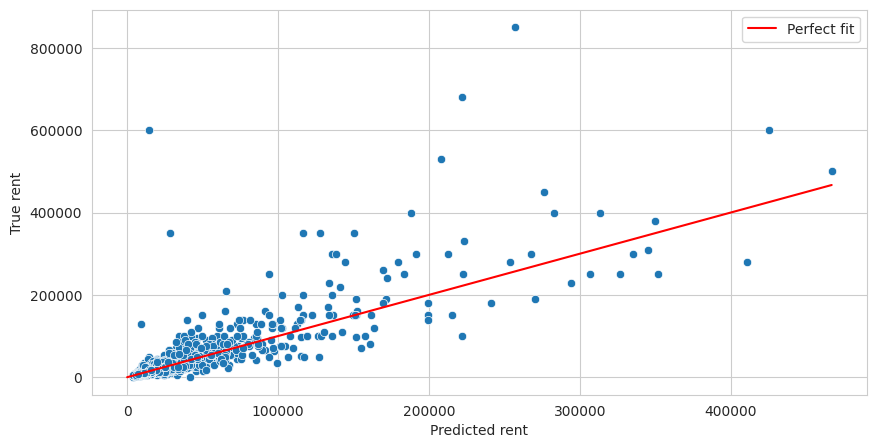

In [43]:
y_pred_box = best_models['HistGradBoost'].predict(X_test)
y_pred = inv_boxcox(y_pred_box, _lambda)

print(f'HistGradBoost error: {root_mean_squared_error(y_true, y_pred)}')

plt.figure(figsize=(10, 5))

sns.scatterplot(x=y_pred, y=y_true)

line = np.linspace(0, np.max(y_pred))
plt.plot(line, line, color='red', label="Perfect fit")

plt.xlabel('Predicted rent')
plt.ylabel('True rent')

plt.legend()
plt.show()